In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def column_renamer(input):
    rename_dict = {
        "Unnamed: 0": "Run number",
        "angle_shfit_gandalf": "Angle between direction of shower and track",
        "distance_shfit_gandalf": "Distance between shower and track start",
        "dt_shfit_gandalf": "Time difference between shower and track start",
        "E.trks.len[:,0]": "Track length",
        "E.trks.dir.x[:,0]": "Track x-direction",
        "E.trks.dir.y[:,0]": "Track y-direction",
        "E.trks.dir.z[:,0]": "Track z-direction",
        "E.trks.pos.x[:,0]": "Track x-position",
        "E.trks.pos.y[:,0]": "Track y-position",
        "E.trks.pos.z[:,0]": "Track z-position",
        "E.trks.dir.x[:,1]": "Shower x-direction",
        "E.trks.dir.y[:,1]": "Shower y-direction",
        "E.trks.dir.z[:,1]": "Shower z-direction",
        "E.trks.pos.x[:,1]": "Shower x-position",
        "E.trks.pos.y[:,1]": "Shower y-position",
        "E.trks.pos.z[:,1]": "Shower z-position",
        "T.feat_Neutrino2020.cherCond_n_doms": "Number of detector spheres with unscattered light signals",
        "T.feat_Neutrino2020.gandalf_nHits": "Number of hits used in track reconstruction",
        "T.sum_mc_nu.by": "Inelasticity"
    }
    try:
        newname = rename_dict[input]
    except KeyError:
        newname = input
        
    return newname

def pdgid_converter(id):
    pdgid_dict = {
        12: "Electron neutrino",
        14: "Muon neutrino",
        16: "Tau neutrino",
        -12: "Anti electron neutrino",
        -14: "Anti muon neutrino",
        -16: "Anti tau neutrino"
    }
    return pdgid_dict[id]

In [3]:
filepath = r"data/newselection.csv"

dataframe = pd.read_csv(filepath)
dataframe.rename(column_renamer, axis="columns", inplace=True)

dataframe

,Run number,index,E.run_id,exposure,weight,weight_rate,Angle between direction of shower and track,"closest[:,0,0]","closest[:,0,1]","closest[:,1,0]",...,T.sum_jppshower.ratio_prefit_fits_near_best,T.sum_jppmuon.n_within_1deg,T.sum_trig_hits.nhits,"E.trks.rec_type[:,0]","E.trks.rec_type[:,1]",Inelasticity,pdgid,is_cc,energy,is_neutrino
0,0,0,12000,6625514.5,3.730160e-04,5.629993e-11,75.145741,62.840773,7.032061e+01,3.789595e+01,...,0.400000,1,18,4000,4000,0.290779,-12,1.0,177.187285,1.0
1,1,1,12000,6625514.5,3.847163e-04,5.806588e-11,81.951547,41.272965,4.768306e+01,4.712456e+01,...,0.000000,1,15,4000,4000,0.588767,-12,1.0,323.063074,1.0
2,2,2,12000,6625514.5,5.896767e-04,8.900090e-11,90.000000,29.085620,2.900304e+01,1.000000e+20,...,0.000000,1,140,4000,0,0.050258,-12,1.0,125.963081,1.0
3,3,3,12000,6625514.5,1.125916e-03,1.699365e-10,90.000000,17.880590,2.446714e+01,1.000000e+20,...,0.000000,1,28,4000,0,0.325333,-12,1.0,279.959710,1.0
4,4,4,12000,6625514.5,2.045558e-03,3.087395e-10,42.081193,33.322709,4.458252e+01,1.783924e+01,...,0.687500,1,65,4000,4000,0.945951,-12,1.0,160.574914,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145951,1145951,145951,12999,6625514.5,2.851741e-07,4.304181e-14,94.172571,44.409249,1.000000e+20,2.854383e+01,...,0.400000,1,28,4000,4000,0.061526,16,1.0,2448.162096,1.0
1145952,1145952,145952,12999,6625514.5,6.330232e-06,9.554325e-13,13.455761,36.485096,4.134148e+01,1.206134e+01,...,0.600000,1,372,4000,4000,0.328807,16,1.0,613.956703,1.0
1145953,1145953,145953,12999,6625514.5,1.814828e-06,2.739150e-13,61.076028,25.459556,4.071953e+01,5.181339e+01,...,0.000000,2,9,4000,4000,0.560040,16,1.0,1165.439426,1.0
1145954,1145954,145954,12999,6625514.5,4.911171e-07,7.412512e-14,8.214167,37.261636,3.721765e+01,1.508203e+01,...,0.302326,1,389,4000,4000,0.848183,16,1.0,1205.088885,1.0


In [ ]:
dataframe.apply(lambda row: pdgid_converter(row["pdgid"]), axis=1)

In [4]:
for column in dataframe.columns:
    print(column)

Run number
index
E.run_id
exposure
weight
weight_rate
Angle between direction of shower and track
closest[:,0,0]
closest[:,0,1]
closest[:,1,0]
closest[:,1,2]
crkv_nhits100[:,0,0]
crkv_nhits100[:,0,2]
crkv_nhits100[:,1,2]
crkv_nhits50[:,0,0]
Distance between shower and track start
dist_crkv_both_jg
dist_JG_Jsh_track
dist_JSH_JG_track
Time difference between shower and track start
E.trks.fitinf[:,0,0]
E.trks.fitinf[:,0,1]
E.trks.fitinf[:,0,5]
E.trks.fitinf[:,0,9]
Track length
Track x-direction
Track y-direction
Track z-direction
Track x-position
Track y-position
Track z-position
Shower x-direction
Shower y-direction
Shower z-direction
Shower x-position
Shower y-position
Shower z-position
furthest[:,0,0]
furthest[:,1,0]
furthest[:,1,2]
log_distance_shfit_gandalf_for_shfit_time
shortest_4D_dist_jg_jsh
T.feat_Neutrino2020.cherCond_hits_trig_meanZposition
Number of detector spheres with unscattered light signals
T.feat_Neutrino2020.dClosestApproach
Number of hits used in track reconstruction

In [5]:
for index, value in dataframe["pdgid"].value_counts().items():
    print((pdgid_converter(index) + ":").ljust(20), value, sep="\t")

Muon neutrino:      	523653
Anti muon neutrino: 	269731
Electron neutrino:  	176889
Anti electron neutrino:	112556
Tau neutrino:       	33390
Anti tau neutrino:  	29737


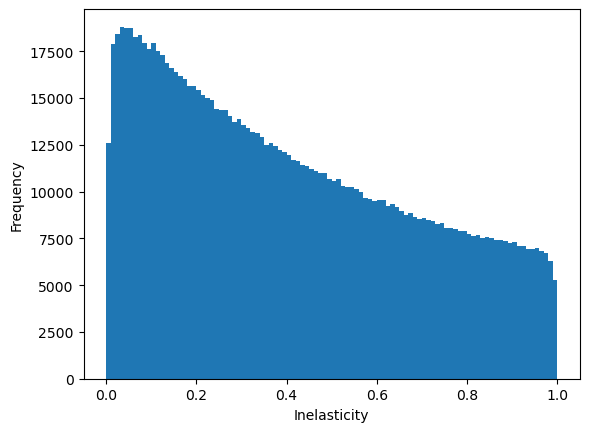

In [6]:
dataframe['Inelasticity'].plot.hist(bins=100, xlabel='Inelasticity')
plt.show()

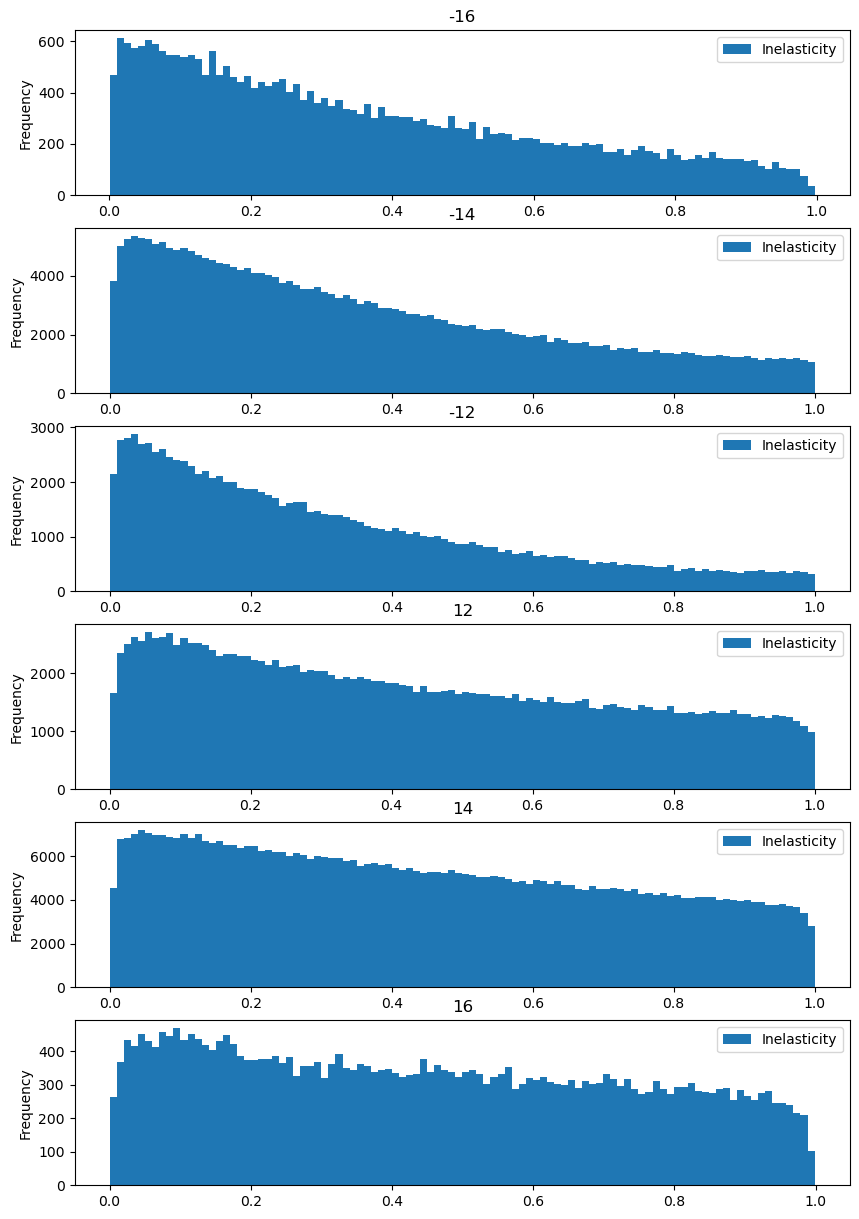

In [7]:
dataframe[['Inelasticity','pdgid']].plot.hist(by='pdgid',bins=100,figsize=(10, 15))
plt.show()